# Backtracking Revisited

The below examples further elaborate how backtracking works. These material is taken from lecture 4 of MIT 6.009 course.

## Problem: Dinner Invitation

Let's say your current social network looks like this:

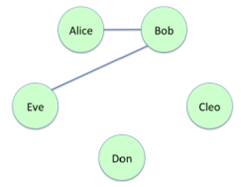

This means that Alice dislikes Bob, and Bob dislikes Eve. However, Alice does not dislike Eve. We want to host a dinner, but we cannot have 2 people who dislike each other in the dinner. Given a social networkl, what is the maximum number of people we can invite?

> Our dinner problem is a classic problem called the maximum independent set (MIS) problem: Given a graph with vertices and edges, find a maximum set of vertices that do not have edges between them. 

### Approach 1: Greedy Approach

One way is that at each iteration, we consider the person with the least number of disliked people. We add this person to our dinner, while excluding all the people he/she dislikes.

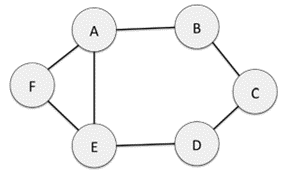

The greedy method may add C, eliminate B and D. Then add A, eliminate F and E. This produces a guest list of 2 people (C and A). However, we know the optimal solution to this problem is 3 people (F,B,D). So the greedy method cannot work.

### Approach 2: Recursive Backtracking

This is vaguely similar to 0/1 knapsack problem. The decision tree looks like:

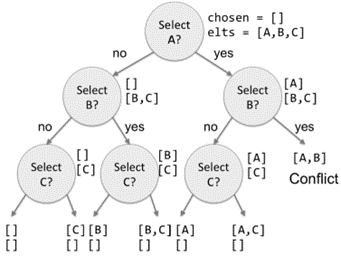


In [1]:
#Using a recursive strategy to solve the Dinner Problem


LargeGuestList = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
LargeDislikes = [['B', 'C'], ['C', 'D'], ['D', 'E'], ['F','G'],
                 ['F', 'H'], ['F', 'I'], ['G', 'H']]


def dinnerCheck(invited, dislikePairs):
    #check that everyone in invited likes each other
    good = True
    for j in dislikePairs:
        #Check that each element of j is in guests
        if j[0] in invited and j[1] in invited:
            good = False
    return good

def InviteDinner(guestList,dislikePairs):
    def dfs(i, chosen):
        if i==len(guestList):
            return chosen

        skip=dfs(i+1,chosen)

        #default value of include
        include=chosen
        #if we are allowed to add the current person
        if dinnerCheck(chosen+[guestList[i]],dislikePairs):
            include=dfs(i+1,chosen+[guestList[i]])

        #do the choosing
        if len(skip)>len(include):
            return skip
        else:
            return include
    
    print(dfs(0,[]))

InviteDinner(LargeGuestList, LargeDislikes)


['A', 'B', 'D', 'G', 'I']


## Problem: Solving Sudoku

> The objective is to fill a partially filled 9 × 9 grid with digits so that each column, each row, and each of the nine 3 × 3 sub-grids or sectors that compose the grid contains all of the digits from 1 to 9.

The grid is represented by a two-dimensional array/list called grid and a value of 0 means that the location is empty.

Grid locations are filled in through a process of a systematic ordered search for empty locations, guessing values for each location, and backtracking, i.e., undoing guesses if they are incorrect.

Procedure `findNextCellToFill`, finds the first empty (value 0) by searching the grid in a predetermined order. If the procedure cannot find an empty value, the puzzle is solved. 

In [2]:
#This procedure finds the next empty square to fill on the Sudoku grid
def findNextCellToFill(grid):
    #Look for an unfilled grid location
    for x in range(0, 9):
        for y in range(0, 9):
            if grid[x][y] == 0:
                return x, y
    return -1, -1

Procedure `isValid`, checks that the current grid that is partially filled in does not violate the rules of Sudoku.  This is reminiscent of `noConflicts` in the N queens puzzle that also worked with partial configurations, i.e., configurations with fewer than N queens.

In [3]:
#This procedure checks if setting the (i, j) square to e is valid
def isValid(grid, i, j, e):
    #checks that patch[x] in row i is not e, for the leftmost patch to the rightmost patch
    rowOk = all([e != grid[i][x] for x in range(9)])
    if rowOk:
        #same thing along this column
        columnOk = all([e != grid[x][j] for x in range(9)])
        if columnOk:
            #finding the top left x,y co-ordinates of
            #the section or sub-grid containing the i,j cell

            #check inserting e into this 3x3 grid are valid
            secTopX, secTopY = 3 *(i//3), 3 *(j//3)
            for x in range(secTopX, secTopX+3):
                for y in range(secTopY, secTopY+3):
                    if grid[x][y] == e:
                        return False
            return True
    return False

The first important point to note about solveSudoku is that there is only one copy of 
grid that is being operated on and modified. solveSudoku is therefore an in-place 
recursive search exactly like N-queens.  Because of this, we have to change back the 
value of the position that was filled in with an incorrect number (Line 9) back to 0 (Line 13) after the recursive call for a particular guess returns False and the loop continues. After we exit the loop, before returning False, we need to clear the grid entry.

In [4]:
#Global variable set to 0
backtracks = 0

#This procedure fills in the missing squares of a Sudoku puzzle
#obeying the Sudoku rules through brute-force guessing and checking
def solveSudoku(grid, i=0, j=0):
    #need to define this inside the function
    global backtracks

    #find the next cell to fill
    i, j = findNextCellToFill(grid)
    if i == -1:
        return True

    #go from 1 to 9
    for e in range(1, 10):
        #Try different values in i, j location
        if isValid(grid, i, j, e):
            grid[i][j] = e
            #recursive exploration
            if solveSudoku(grid, i, j):
                return True
            
            #Undo the current cell for backtracking
            #each backtracking adds an extra call layer
            backtracks += 1
    grid[i][j] = 0

    return False

simple printing function

In [11]:
def printSudoku(grid):
    numrow = 0
    for row in grid:
        if numrow % 3 == 0 and numrow != 0:
            print (' ')
        print (row[0:3], ' ', row[3:6], ' ', row[6:9])
        numrow += 1
    print('   ===END===   ')
    return

In [21]:
def printSudoku(grid):
    numrow = 0
    for row in grid:
        if numrow % 3 == 0 and numrow != 0:
            print (' ')
        print (row[0:3], ' ', row[3:6], ' ', row[6:9])
        numrow += 1       
    return

input = [[5,1,7,6,0,0,0,3,4],
         [2,8,9,0,0,4,0,0,0],
         [3,4,6,2,0,5,0,9,0],
         [6,0,2,0,0,0,0,1,0],
         [0,3,8,0,0,6,0,4,7],
         [0,0,0,0,0,0,0,0,0],
         [0,9,0,0,0,0,0,7,8],
         [7,0,3,4,0,0,5,6,0],
         [0,0,0,0,0,0,0,0,0]]

medium  = [[5,1,7,6,0,0,0,3,4],
         [0,8,9,0,0,4,0,0,0],
         [3,0,6,2,0,5,0,9,0],
         [6,0,0,0,0,0,0,1,0],
         [0,3,0,0,0,6,0,4,7],
         [0,0,0,0,0,0,0,0,0],
         [0,9,0,0,0,0,0,7,8],
         [7,0,3,4,0,0,5,6,0],
         [0,0,0,0,0,0,0,0,0]]


hard  = [[8,5,0,0,0,2,4,0,0],
         [7,2,0,0,0,0,0,0,9],
         [0,0,4,0,0,0,0,0,0],
         [0,0,0,1,0,7,0,0,2],
         [3,0,5,0,0,0,9,0,0],
         [0,4,0,0,0,0,0,0,0],
         [0,0,0,0,8,0,0,7,0],
         [0,1,7,0,0,0,0,0,0],
         [0,0,0,0,3,6,0,4,0]]

diff  = [[0,0,5,3,0,0,0,0,0],
         [8,0,0,0,0,0,0,2,0],
         [0,7,0,0,1,0,5,0,0],
         [4,0,0,0,0,5,3,0,0],
         [0,1,0,0,7,0,0,0,6],
         [0,0,3,2,0,0,0,8,0],
         [0,6,0,5,0,0,0,0,9],
         [0,0,4,0,0,0,0,3,0],
         [0,0,0,0,0,9,7,0,0]]



print('Input:')
printSudoku(input)
solveSudoku(input)
print('Output:')
printSudoku(input)
print ('Backtracks = ', backtracks)

backtracks=0
print('Input:')
printSudoku(medium)
solveSudoku(medium)
print('Output:')
printSudoku(medium)
print ('Backtracks = ', backtracks)

backtracks=0
print('Input:')
printSudoku(hard)
solveSudoku(hard)
print('Output:')
printSudoku(hard)
print ('Backtracks = ', backtracks)

backtracks=0
print('Input:')
printSudoku(diff)
solveSudoku(diff)
print('Output:')
printSudoku(diff)
print ('Backtracks = ', backtracks)

Input:
[5, 1, 7]   [6, 0, 0]   [0, 3, 4]
[2, 8, 9]   [0, 0, 4]   [0, 0, 0]
[3, 4, 6]   [2, 0, 5]   [0, 9, 0]
 
[6, 0, 2]   [0, 0, 0]   [0, 1, 0]
[0, 3, 8]   [0, 0, 6]   [0, 4, 7]
[0, 0, 0]   [0, 0, 0]   [0, 0, 0]
 
[0, 9, 0]   [0, 0, 0]   [0, 7, 8]
[7, 0, 3]   [4, 0, 0]   [5, 6, 0]
[0, 0, 0]   [0, 0, 0]   [0, 0, 0]
Output:
[5, 1, 7]   [6, 9, 8]   [2, 3, 4]
[2, 8, 9]   [1, 3, 4]   [7, 5, 6]
[3, 4, 6]   [2, 7, 5]   [8, 9, 1]
 
[6, 7, 2]   [8, 4, 9]   [3, 1, 5]
[1, 3, 8]   [5, 2, 6]   [9, 4, 7]
[9, 5, 4]   [7, 1, 3]   [6, 8, 2]
 
[4, 9, 5]   [3, 6, 2]   [1, 7, 8]
[7, 2, 3]   [4, 8, 1]   [5, 6, 9]
[8, 6, 1]   [9, 5, 7]   [4, 2, 3]
Backtracks =  6942
Input:
[5, 1, 7]   [6, 0, 0]   [0, 3, 4]
[0, 8, 9]   [0, 0, 4]   [0, 0, 0]
[3, 0, 6]   [2, 0, 5]   [0, 9, 0]
 
[6, 0, 0]   [0, 0, 0]   [0, 1, 0]
[0, 3, 0]   [0, 0, 6]   [0, 4, 7]
[0, 0, 0]   [0, 0, 0]   [0, 0, 0]
 
[0, 9, 0]   [0, 0, 0]   [0, 7, 8]
[7, 0, 3]   [4, 0, 0]   [5, 6, 0]
[0, 0, 0]   [0, 0, 0]   [0, 0, 0]
Output:
[5, 1, 7]   [6, 9, 8]